In [1]:
import pandas as pd
import numpy  as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.duplicated().sum() #checking for duplicated rows

29

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns
catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [9]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')

for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg', '')

#converting from string -> float for the raw column
df['Ram'] = df['Ram'].astype('int32')

df['Weight'] = df['Weight'].astype('float64')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\3694219585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'], color='red')


<AxesSubplot: xlabel='Price', ylabel='Density'>

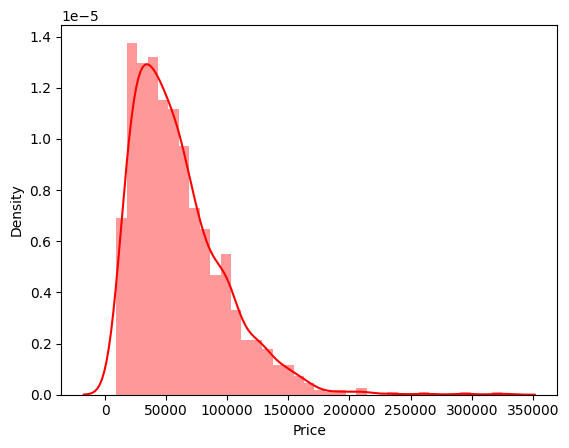

In [12]:
#viewing the distribution of the price column

sn.distplot(df['Price'], color='red')

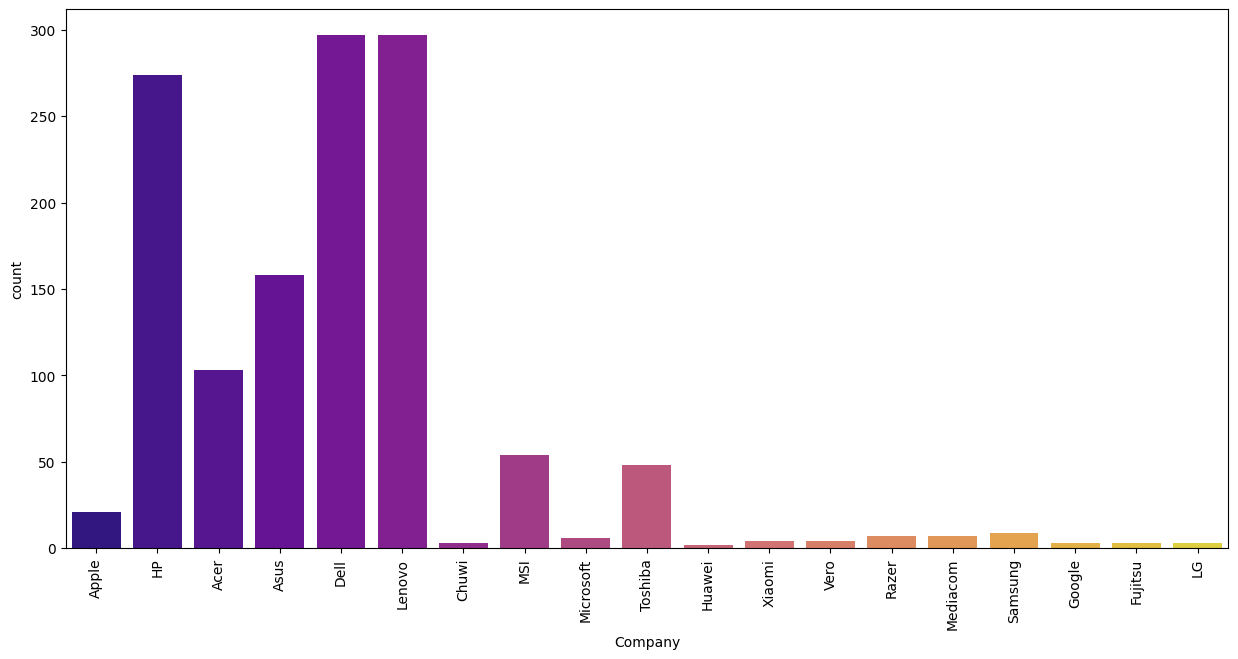

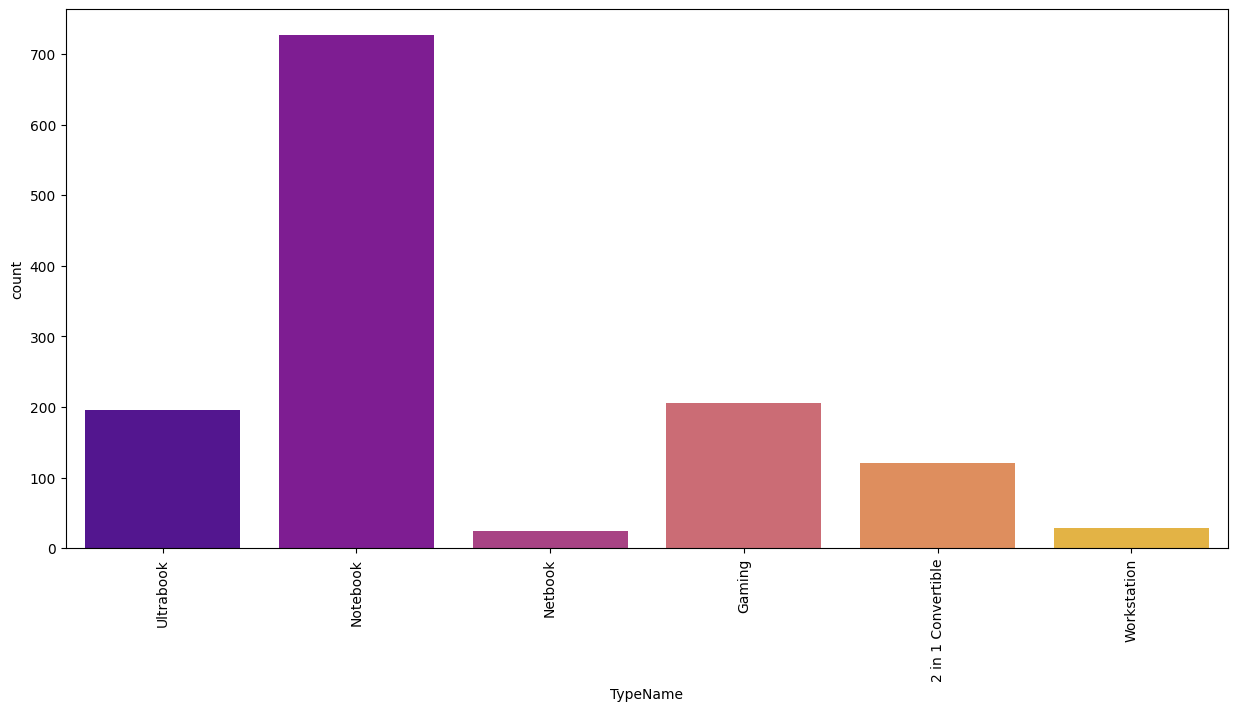

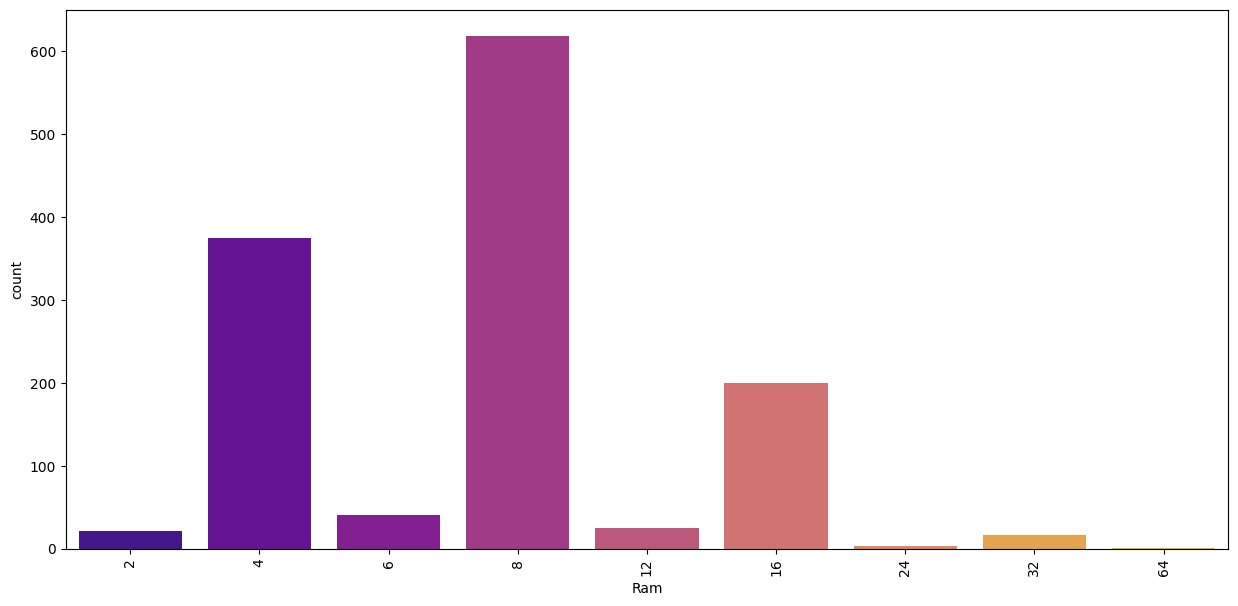

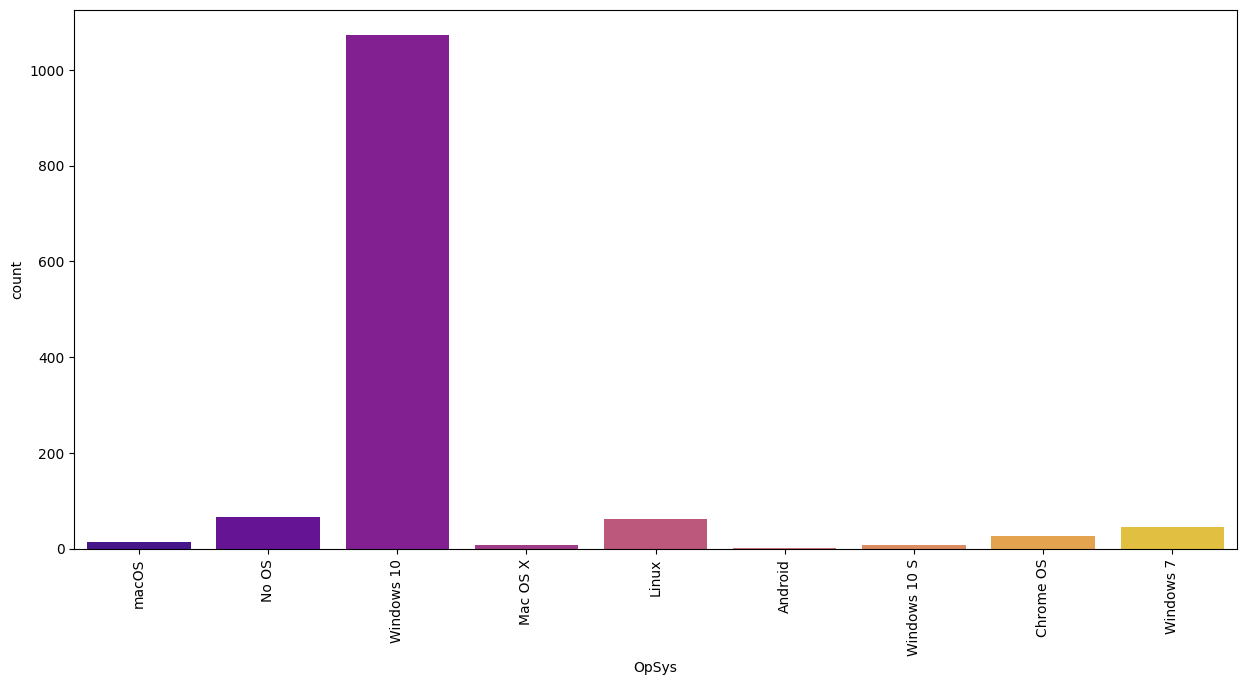

In [13]:
# plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sn.countplot(x=df[col], palette='plasma') #count categories
    plt.xticks(rotation='vertical')
toview = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview:
    drawplot(col)

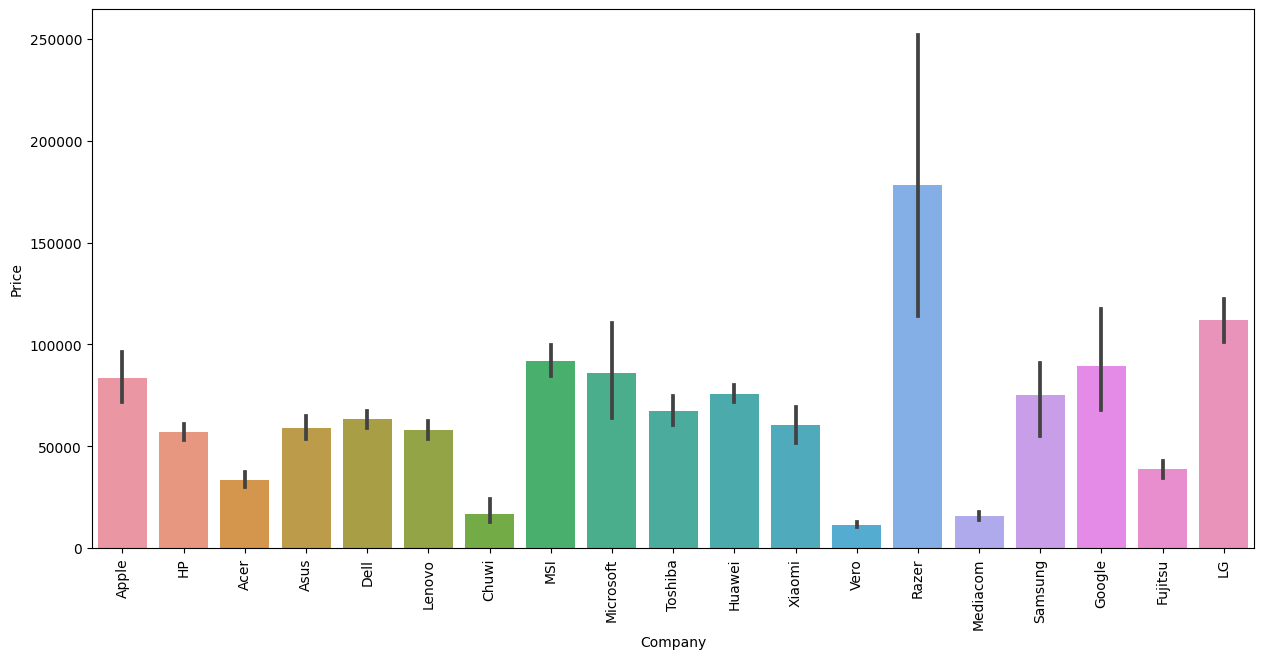

In [14]:
#that shows average price of the laptop brands

plt.figure(figsize=(15,7))
sn.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

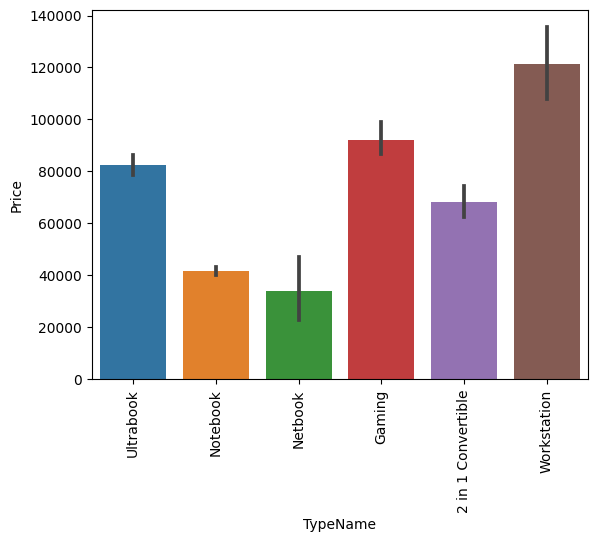

In [15]:
sn.barplot(x=df['TypeName'], y= df['Price'])
plt.xticks(rotation='vertical') #gets or sets the properties of tick locations and labels of the x-axis.

<AxesSubplot: xlabel='Inches', ylabel='Price'>

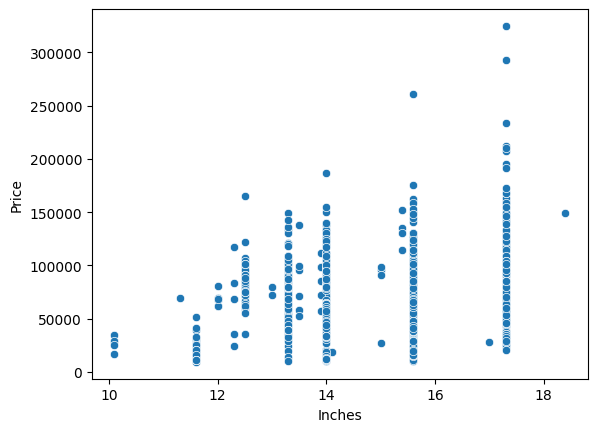

In [16]:
sn.scatterplot(x=df['Inches'], y= df['Price'])

In [17]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [18]:
#created touchscreen column : is screenResolution contains touchscreen or not
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


<AxesSubplot: xlabel='TouchScreen', ylabel='count'>

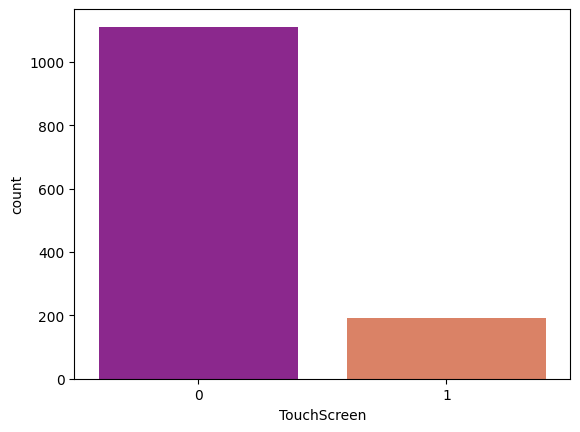

In [19]:
sn.countplot(x=df['TouchScreen'], palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

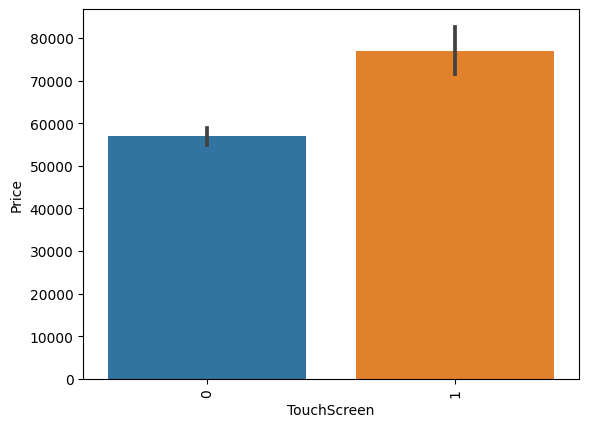

In [20]:
sn.barplot(x=df['TouchScreen'], y=df['Price'])
plt.xticks(rotation='vertical')

In [21]:
df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if 'IPS' in element else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
945,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,AMD FX 8800P 2.1GHz,16,512GB SSD + 1TB HDD,AMD Radeon R9 M385,Windows 10,2.50,53226.72,0,1
697,Asus,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,35644.32,1,0
727,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.71,34578.72,1,0
600,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,64948.32,0,0
1137,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.50,41771.52,0,0


In [22]:
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

<AxesSubplot: xlabel='IPS', ylabel='count'>

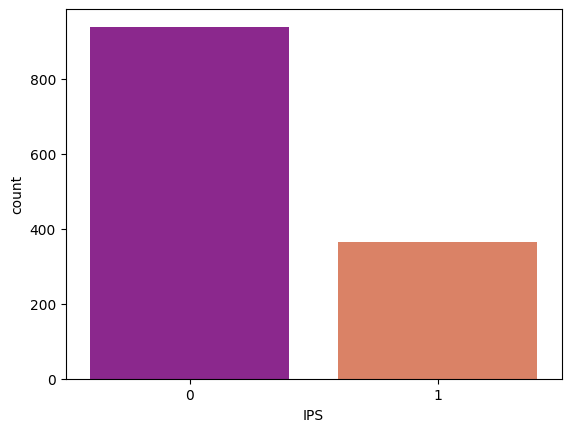

In [23]:
sn.countplot(x=df['IPS'], palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

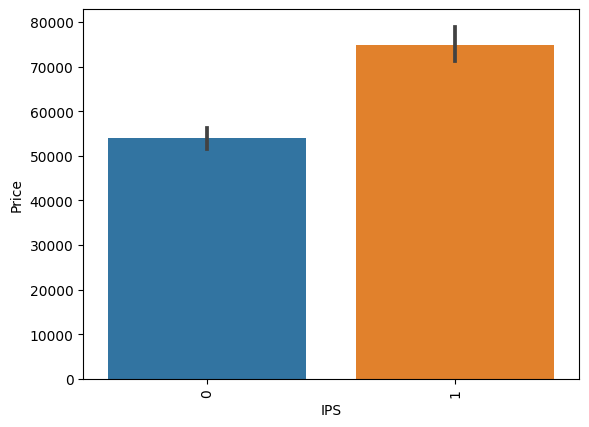

In [24]:
sn.barplot(x=df['IPS'], y=df['Price'])
plt.xticks(rotation='vertical')

Extracting the X Resolution and the Y Resolution

In [25]:
splitdf = df['ScreenResolution'].str.split('x', n=1, expand=True) # splitted the text at the "x" letter and seperate the 2 parts
df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [26]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [27]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\2889457033.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), annot=True, cmap='plasma') #calculated the relationship between each column in data set.


<AxesSubplot: >

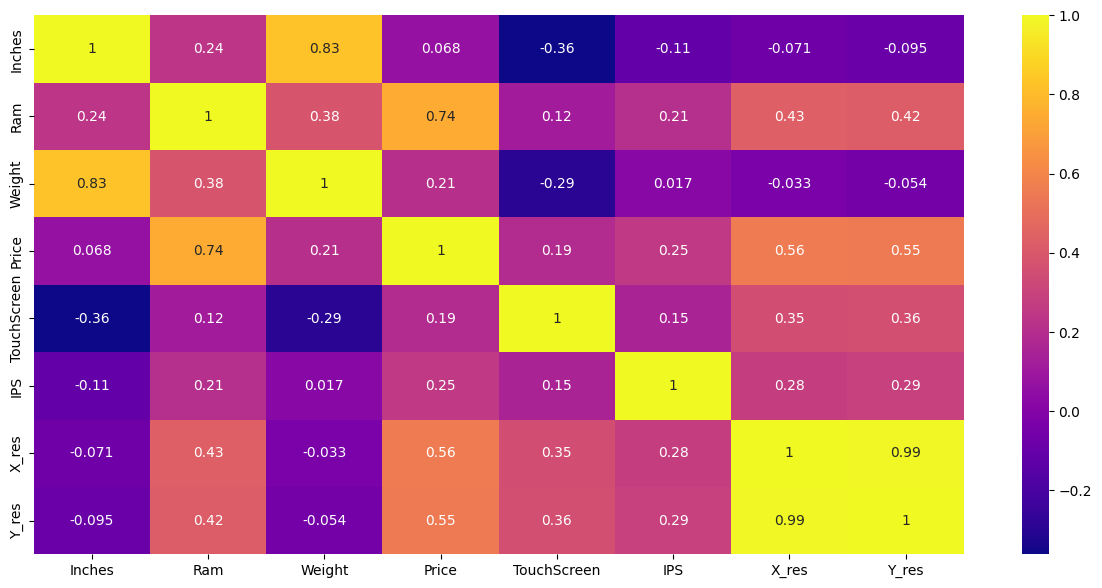

In [28]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(), annot=True, cmap='plasma') #calculated the relationship between each column in data set.

In [29]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [30]:
df.drop(columns=['ScreenResolution', 'X_res','Y_res','Inches'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [31]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [32]:
df['CPU_Name'] = df['Cpu'].apply(lambda text:' '.join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [33]:
def processortype(text):
    if text == 'Intel Core i5' or text== 'Intel Core i7' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
           return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['CPU_Name'] = df['CPU_Name'].apply(lambda text:processortype(text))
df.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

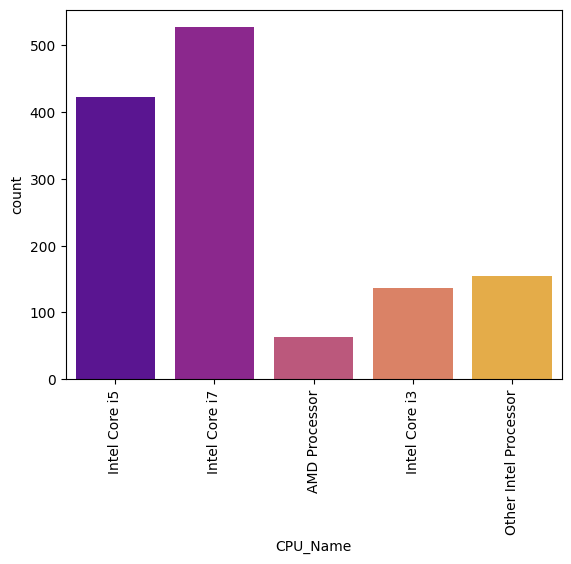

In [34]:
sn.countplot(x=df['CPU_Name'], palette='plasma')
plt.xticks(rotation='vertical')

In [35]:
df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [36]:
df['CPU_Name'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU_Name, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

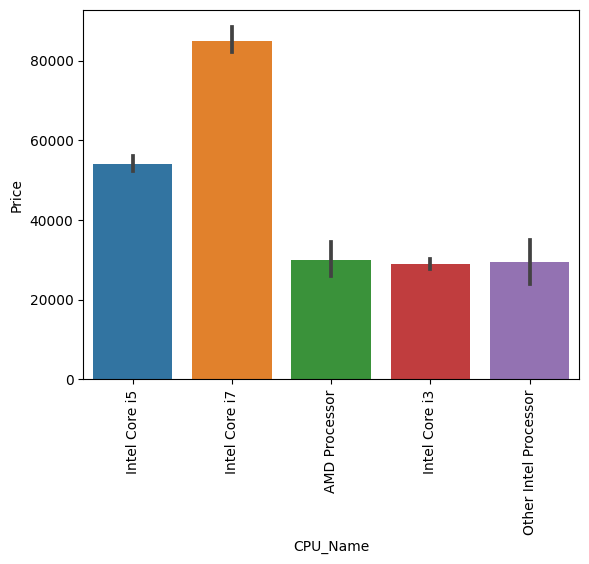

In [37]:
sn.barplot(x=df['CPU_Name'], y=df['Price'])
plt.xticks(rotation='vertical')


<AxesSubplot: xlabel='Ram', ylabel='count'>

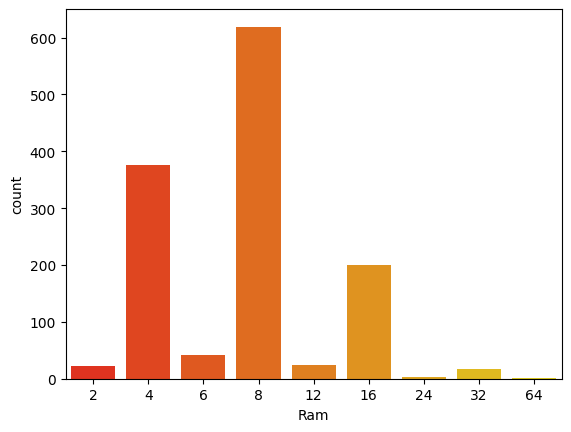

In [38]:
sn.countplot(x=df['Ram'], palette='autumn')

<AxesSubplot: xlabel='Ram', ylabel='Price'>

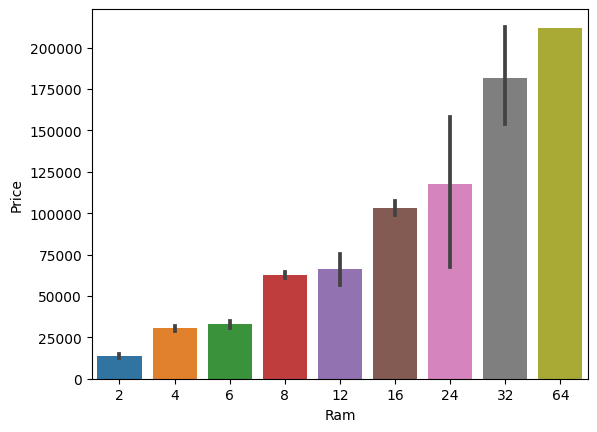

In [39]:
sn.barplot(x=df['Ram'], y=df['Price']) #good correlation

In [40]:
df['Memory'].head(30)

0                  128GB SSD
1        128GB Flash Storage
2                  256GB SSD
3                  512GB SSD
4                  256GB SSD
5                  500GB HDD
6        256GB Flash Storage
7        256GB Flash Storage
8                  512GB SSD
9                  256GB SSD
10                 500GB HDD
11                 500GB HDD
12                 256GB SSD
13                 256GB SSD
14                 256GB SSD
15                 256GB SSD
16                 256GB SSD
17                 512GB SSD
18                   1TB HDD
19                 128GB SSD
20        32GB Flash Storage
21      128GB SSD +  1TB HDD
22                 500GB HDD
23                 256GB SSD
24                 256GB SSD
25                   1TB HDD
26       128GB Flash Storage
27                 256GB SSD
28    256GB SSD +  256GB SSD
29                   1TB HDD
Name: Memory, dtype: object

In [41]:
df['Memory'] =df['Memory'].astype(str).replace('\.0','', regex=True) #removed decimal space
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000') # converted to GB

newdf = df['Memory'].str.split('+', n=1,expand=True)
newdf.head(30)



,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
5,500 HDD,None
6,256 Flash Storage,None
7,256 Flash Storage,None
8,512 SSD,None
9,256 SSD,None


In [42]:
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [43]:
def applychanges(value):
    df['Layer1'+ value] = df['first'].apply(lambda x:1 if value in x else 0)


listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [44]:
df['first'] = df['first'].str.replace(r'\D','') #remove all characters
df['first'].value_counts()

C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\3011925421.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','') #remove all characters


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [45]:
df['second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [46]:
df['second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [47]:
def applychanges1(value):
    df['Layer2' + value] = df['second'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
df['second'] = df['second'].fillna('0')
for value in listtoapply:
    applychanges1(value)

df['second'] = df['second'].str.replace(r'\D','')
df['second'].value_counts()


C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\3364620293.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D','')


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [48]:
df['first'] = df['first'].astype('int')
df['second'] = df['second'].astype('int')

In [49]:
df['HDD'] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["second"]*df["Layer2FlashStorage"])


## dropping of uncessary columns

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [50]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'], inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [51]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [52]:
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


<AxesSubplot: xlabel='Gpu Brand', ylabel='count'>

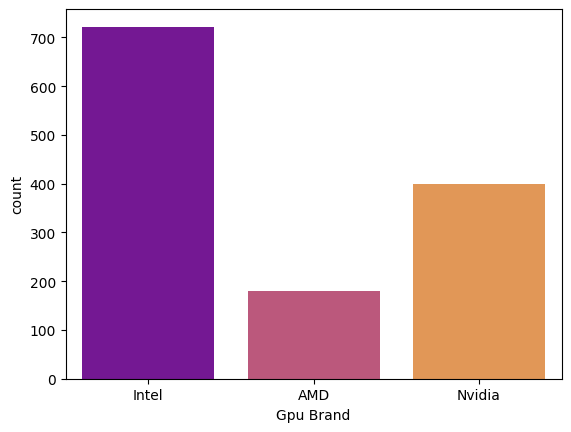

In [53]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df = df[df['Gpu Brand'] != 'ARM'] #there is no value for ARM
sn.countplot(x=df['Gpu Brand'], palette='plasma')

<AxesSubplot: xlabel='Gpu Brand', ylabel='Price'>

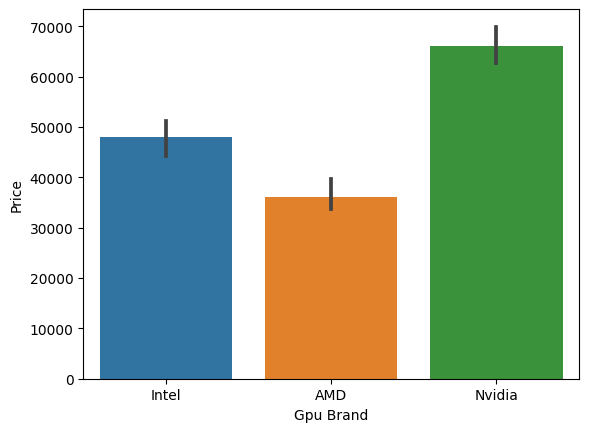

In [54]:
sn.barplot(x=df['Gpu Brand'], y=df['Price'], estimator=np.median)

In [55]:
df.drop(columns=['Gpu'], inplace=True)
df.head()

C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\1449269692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'], inplace=True)


,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [56]:
def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()
    

C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\314140288.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))


,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


<AxesSubplot: xlabel='OpSys', ylabel='count'>

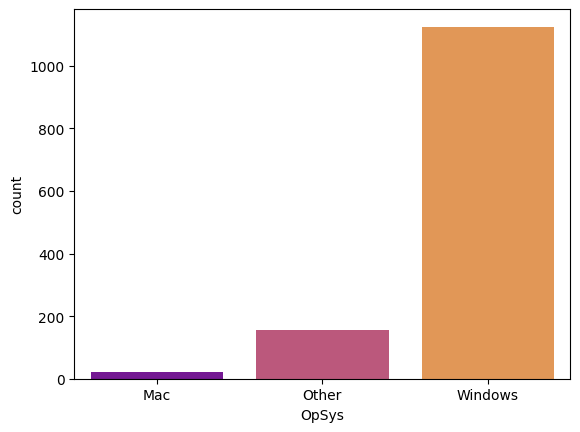

In [57]:
sn.countplot(x=df['OpSys'], palette='plasma')

C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\2851933567.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x=df['Weight'])


<AxesSubplot: ylabel='Density'>

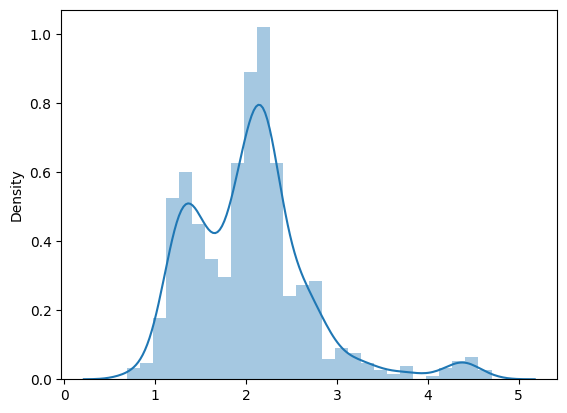

In [58]:
sn.distplot(x=df['Weight'])

<AxesSubplot: xlabel='Weight', ylabel='Price'>

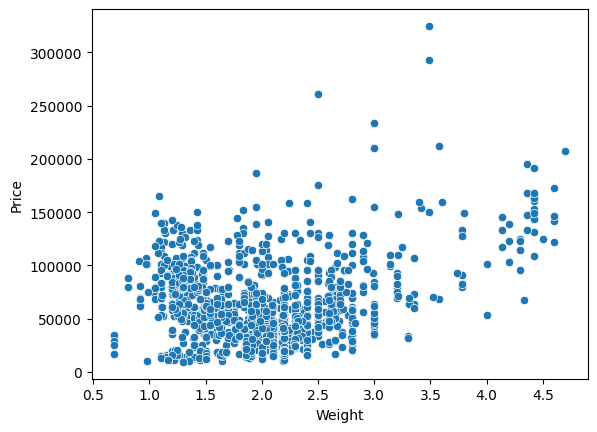

In [59]:
sn.scatterplot(x=df['Weight'],y=df['Price'])

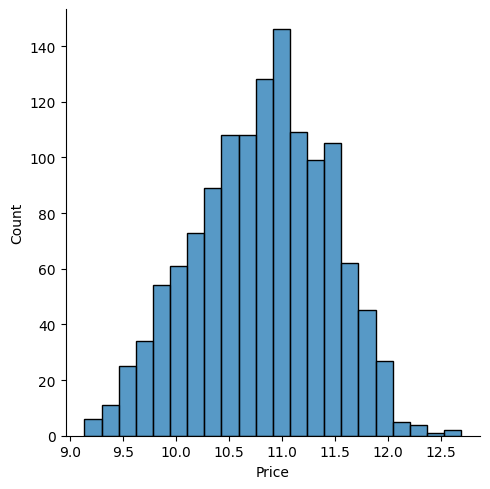

In [60]:
sn.displot(np.log(df['Price'])) #got Price column as a gaussian distibution

C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\3094489046.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), annot=True, cmap='plasma') #corr has been changed.


<AxesSubplot: >

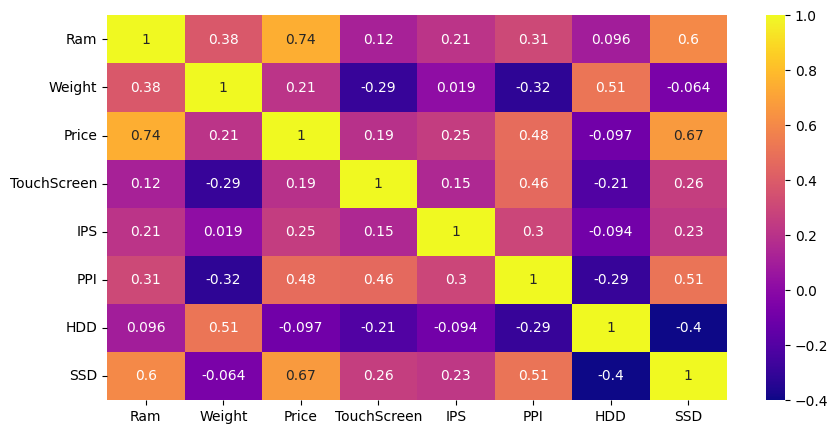

In [61]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(), annot=True, cmap='plasma') #corr has been changed.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [63]:
test = np.log(df['Price'])
train = df.drop(['Price'], axis=1)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.15, random_state=2) # 15% for test, 85% for train
X_train.shape, X_test.shape

((1106, 12), (196, 12))

In [65]:
X_test

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand
248,HP,Notebook,4,Windows,1.49,0,1,165.632118,Intel Core i5,500,0,Intel
555,Asus,Notebook,4,Other,2.00,0,0,100.454670,Other Intel Processor,500,0,Intel
1251,HP,Notebook,4,Windows,1.86,0,0,100.454670,AMD Processor,500,0,AMD
547,Lenovo,Notebook,4,Other,2.15,0,0,141.211998,Intel Core i5,1000,0,Intel
885,HP,2 in 1 Convertible,4,Windows,1.28,1,0,165.632118,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,Windows,3.35,0,1,127.335675,Intel Core i5,1000,128,Nvidia
172,Lenovo,Notebook,4,Other,2.20,0,0,100.454670,AMD Processor,500,0,AMD
322,Asus,Notebook,8,Windows,2.00,0,0,157.350512,Intel Core i7,0,256,Intel
996,HP,Ultrabook,8,Windows,1.11,1,1,165.632118,Intel Core i7,0,256,Intel


In [66]:
mapper = {i:value for i, value in enumerate(X_train.columns)} # i : current iteration, value : item at the current iteration
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_Name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu Brand'}

In [67]:
#Linear Regression

step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2 = LinearRegression()
pipe  = Pipeline([('step1', step1),
                   ('step2', step2) ]) #giving all values to pipeline
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test) #make predictions on test set

print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8073277450155094
MAE 0.2101782795301915


In [68]:
#Ridge Regression

step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,3,8,11])], remainder='passthrough')
step2 = Ridge(alpha=10)
pipe  = Pipeline([('step1', step1),
                   ('step2', step2) ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8127331033739458
MAE 0.20926802210371448


In [69]:
#LassoRegression
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,3,8,11])], remainder='passthrough')
step2 = Lasso(alpha=0.001)
pipe  = Pipeline([('step1', step1),
                   ('step2', step2) ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8071857199202882
MAE 0.2111435067855401


In [70]:
#Decision Tree
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,3,8,11])], remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8)
pipe  = Pipeline([('step1', step1),
                   ('step2', step2) ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8270654042678118
MAE 0.18736778751464045


In [71]:
#Random Forest
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8851499847098487
MAE 0.15870252595141304


In [72]:
import pickle

pickle.dump(df, open('df.pkl','wb'))
pickle.dump(pipe, open('pipe.pkl','wb'))

In [73]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [74]:
train.to_csv('traineddata.csv',index=None)

In [76]:
indexList = [0,1,3,8,11]
transfomerList = []
for key,value in mapper.items():
    if key in indexList:
        transfomerList.append(value)
transfomerList

['Company', 'TypeName', 'OpSys', 'CPU_Name', 'Gpu Brand']

In [77]:
train = pd.get_dummies(train, columns=transfomerList, drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_Name_Intel Core i3,CPU_Name_Intel Core i5,CPU_Name_Intel Core i7,CPU_Name_Other Intel Processor,Gpu Brand_Intel,Gpu Brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [79]:
X_train, X_test, y_train, y_test = train_test_split(train,test, test_size=0.15, random_state=2)
X_train.shape, X_test.shape

((1106, 38), (196, 38))

[Text(0.48695515408494544, 0.9782608695652174, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.2209818626999799, 0.9347826086956522, 'CPU_Name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.14562292907825156, 0.8913043478260869, 'CPU_Name_Intel Core i5 <= 0.5\nsquared_error = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(0.09780084845036481, 0.8478260869565217, 'CPU_Name_Intel Core i7 <= 0.5\nsquared_error = 0.08\nsamples = 154\nvalue = 10.233'),
 Text(0.04177613963451369, 0.8043478260869565, 'Weight <= 1.645\nsquared_error = 0.07\nsamples = 135\nvalue = 10.183'),
 Text(0.0074971550973960775, 0.7608695652173914, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.064\nsamples = 10\nvalue = 10.587'),
 Text(0.005355110783854341, 0.717391304347826, 'Weight <= 1.395\nsquared_error = 0.02\nsamples = 8\nvalue = 10.478'),
 Text(0.004284088627083473, 0.6739130434782609, 'squared_error = 0.0\nsamples = 1\nvalue = 10.208'),
 Te

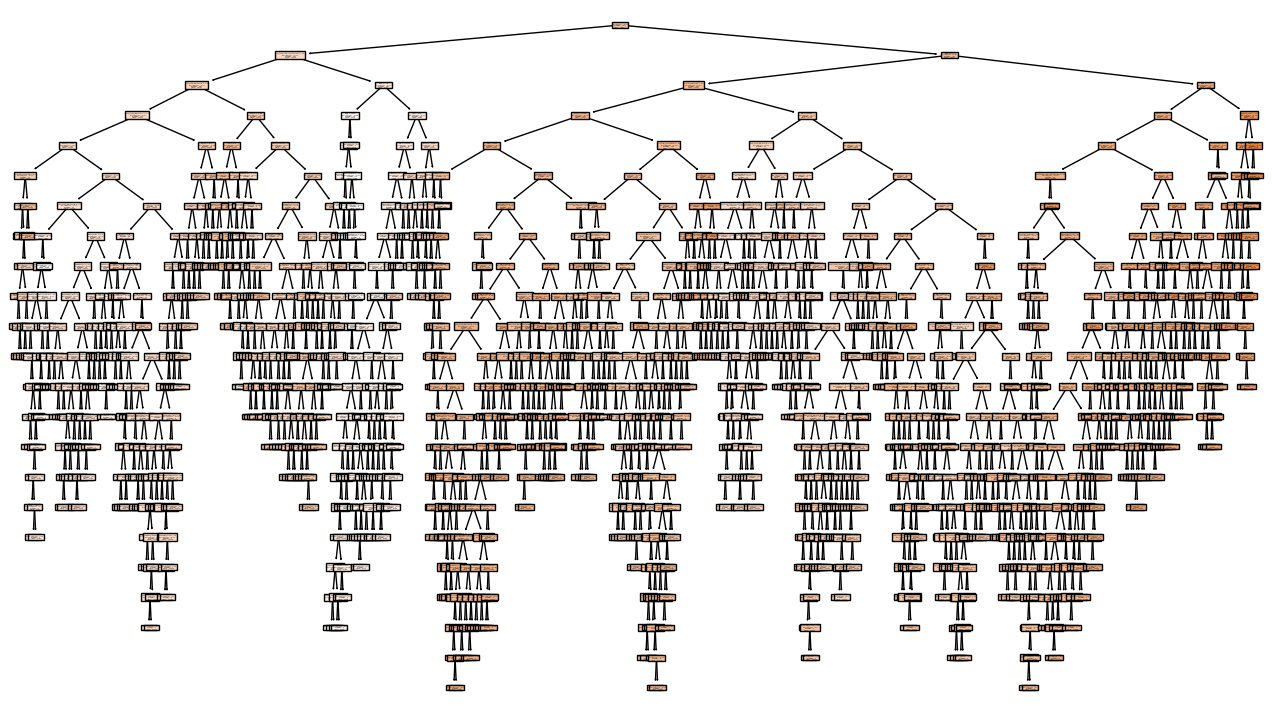

In [80]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [81]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [82]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

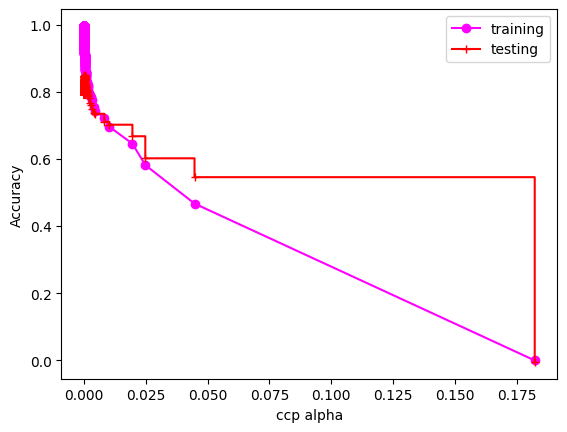

In [83]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.25, 0.7, 'CPU_Name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.125, 0.5, 'squared_error = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(0.375, 0.5, 'squared_error = 0.084\nsamples = 106\nvalue = 9.781'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 11.119'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 10.967'),
 Text(0.5, 0.3, 'squared_error = 0.107\nsamples = 268\nvalue = 11.172'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.131\nsamples = 285\nvalue = 10.775'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 59\nvalue = 10.384'),
 Text(0.875, 0.1, 'squared_error = 0.096\nsamples = 226\nvalue = 10.877'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 191\nvalue = 11.558')]

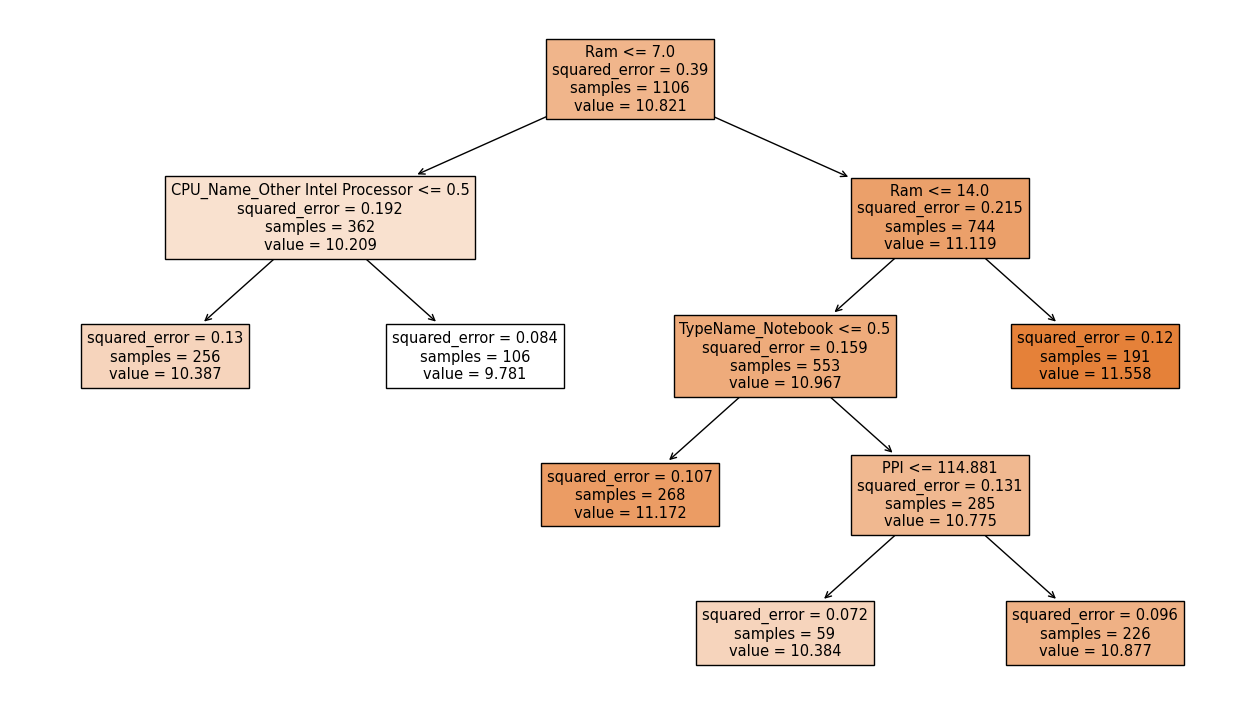

In [84]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [85]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [86]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=222; total time=   1.3s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=222; total time=   1.4s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=222; total time=   1.2s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=222; total time=   1.3s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=222; total time=   1.3s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=466; total time=   0.7s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=466; total time=   0.7s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=466; total time=   0.8s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=466; total time=   0.7s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=466; total time=   0.6s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.4s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.4s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.6s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=   1.3s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=   1.3s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=   1.1s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=   1.3s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=   1.4s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=10, n_estimators=588; total time=   0.9s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=10, n_estimators=588; total time=   0.8s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=10, n_estimators=588; total time=   0.8s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=10, n_estimators=588; total time=   0.9s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=10, n_estimators=588; total time=   0.9s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=1200; total time=   2.4s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=1200; total time=   2.3s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=1200; total time=   2.2s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=1200; total time=   2.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=1200; total time=   2.8s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   1.6s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   1.7s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   1.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   1.8s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   1.6s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.6s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=833; total time=   1.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=833; total time=   1.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=833; total time=   1.3s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=833; total time=   1.5s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=833; total time=   1.8s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14, n_estimators=955; total time=   3.2s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14, n_estimators=955; total time=   2.8s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14, n_estimators=955; total time=   2.9s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14, n_estimators=955; total time=   2.6s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14, n_estimators=955; total time=   2.4s


c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14; t

c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users

[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, m

c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users

[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=

c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warning

[CV] END ccp_alpha=0.01, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=30, max_features=

c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.

[CV] END ccp_alpha=0.01, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_feature

In [87]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.077563,"(DecisionTreeRegressor(ccp_alpha=0.0025, max_d..."
1,Decision Tree,-0.094662,"DecisionTreeRegressor(ccp_alpha=0.005, criteri..."


In [88]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8851499847098487


In [89]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warni

[array([11.2470458]),
 array([11.18267613]),
 array([10.79101662]),
 array([11.55932542]),
 array([11.26116316]),
 array([10.21208214]),
 array([11.5554035]),
 array([11.18267613]),
 array([11.5148446]),
 array([11.02125312]),
 array([10.49561792]),
 array([10.20921644]),
 array([11.55848569]),
 array([10.22700187]),
 array([11.26142533]),
 array([11.26116316]),
 array([10.90890463]),
 array([11.55932542]),
 array([10.6955602]),
 array([11.21496863]),
 array([9.77903817]),
 array([10.98214955]),
 array([10.19429671]),
 array([11.02142346]),
 array([11.08130459]),
 array([10.21208214]),
 array([11.18267613]),
 array([10.88597326]),
 array([11.07334461]),
 array([10.79666166]),
 array([9.78176139]),
 array([10.33236973]),
 array([10.22700187]),
 array([11.55865941]),
 array([11.18267613]),
 array([9.78176139]),
 array([10.19429671]),
 array([10.93396003]),
 array([10.51339758]),
 array([10.88961766]),
 array([10.20921644]),
 array([11.43841809]),
 array([10.390318]),
 array([10.50033844]

In [90]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [91]:
df['Predicted Price'] = np.array(ans)
df

C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\3632443927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted Price'] = np.array(ans)


,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,76653.136606
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,71874.450390
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,48582.400553
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,104749.327722
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,77742.951047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,31010.763004
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,104679.586742
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,17659.659120
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,28722.916436


In [92]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.8879550380698259


In [93]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))
    
predicted

c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\y84201599\Miniconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warni

[array([11.19432828]),
 array([10.88685941]),
 array([10.56036122]),
 array([11.81830692]),
 array([11.32272673]),
 array([9.90337574]),
 array([11.50082276]),
 array([10.88685941]),
 array([11.42376333]),
 array([10.7967314]),
 array([10.22188479]),
 array([9.94401905]),
 array([11.75683023]),
 array([10.27584271]),
 array([11.18550512]),
 array([11.32272673]),
 array([10.73750139]),
 array([11.81830692]),
 array([10.3103659]),
 array([11.05102755]),
 array([9.48342539]),
 array([10.88045983]),
 array([9.72510244]),
 array([10.80617769]),
 array([10.8488257]),
 array([10.08137644]),
 array([10.91923869]),
 array([10.68515458]),
 array([11.175939]),
 array([10.75518108]),
 array([9.62615339]),
 array([9.92493055]),
 array([10.14530589]),
 array([11.64139993]),
 array([10.91923869]),
 array([9.60954191]),
 array([9.93779062]),
 array([10.88120541]),
 array([10.33682148]),
 array([10.76273461]),
 array([10.0170042]),
 array([11.27482362]),
 array([10.35990332]),
 array([10.54787959]),
 a

In [94]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [95]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu Brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,72716.840695
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,53469.111472
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,38575.059398
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,135714.258702
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,82679.480191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,36457.409553
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,87877.352115
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,12757.326034
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,37808.326767


C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\3071764292.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['Price'],hist=False,color='orange',label='Actual')
C:\Users\y84201599\AppData\Local\Temp\ipykernel_17328\3071764292.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

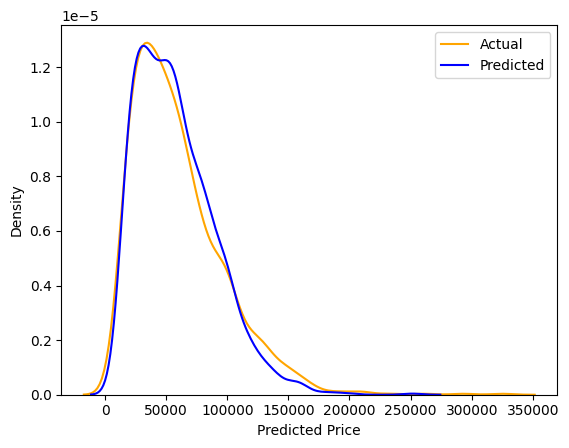

In [96]:
sn.distplot(data['Price'],hist=False,color='orange',label='Actual')
sn.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [97]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()

In [98]:
X_train.iloc[0]

Ram                                 8.00000
Weight                              2.00000
TouchScreen                         0.00000
IPS                                 0.00000
PPI                               100.45467
HDD                                 0.00000
SSD                               128.00000
Company_Apple                       0.00000
Company_Asus                        0.00000
Company_Chuwi                       0.00000
Company_Dell                        0.00000
Company_Fujitsu                     0.00000
Company_Google                      0.00000
Company_HP                          0.00000
Company_Huawei                      0.00000
Company_LG                          0.00000
Company_Lenovo                      0.00000
Company_MSI                         0.00000
Company_Mediacom                    0.00000
Company_Microsoft                   0.00000
Company_Razer                       0.00000
Company_Samsung                     0.00000
Company_Toshiba                 